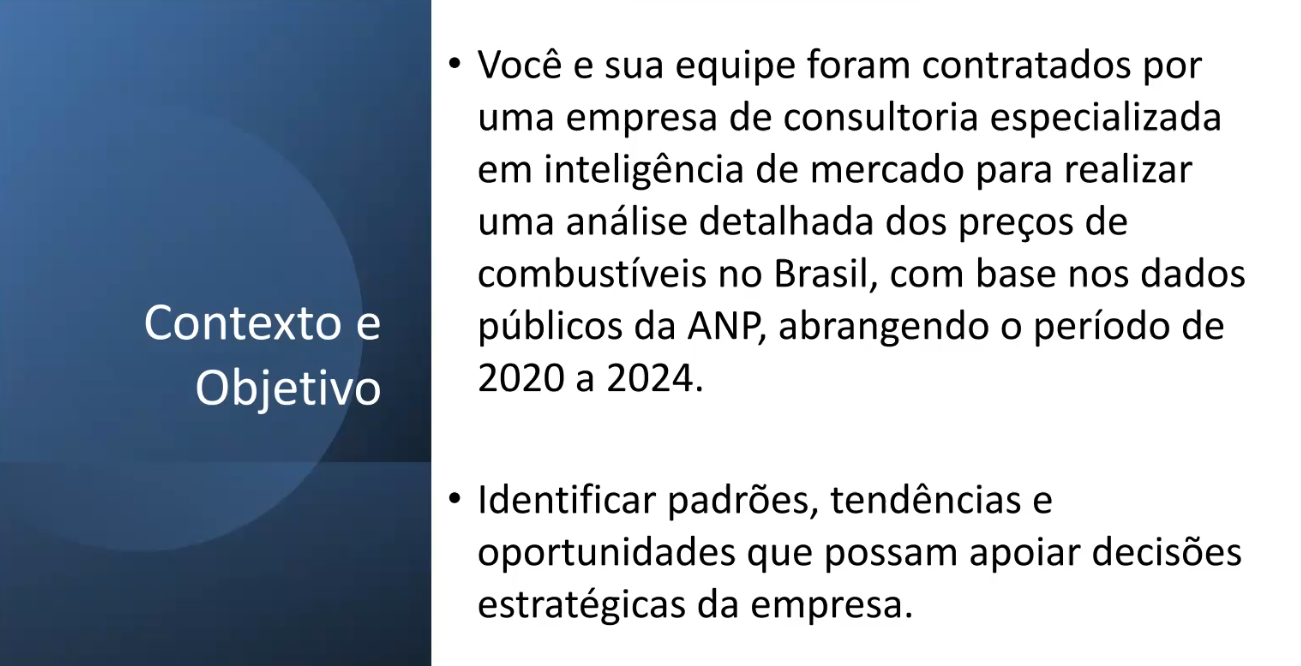

In [ ]:
import pandas as pd

In [ ]:
df201 = pd.read_csv('ca-2020-01.csv',  sep = ';')
df202 = pd.read_csv('ca-2020-02.csv',  sep = ';')
df211 = pd.read_csv('ca-2021-01.csv',  sep = ';')
df212 = pd.read_csv('ca-2021-02.csv',  sep = ';', encoding='latin1')
df221 = pd.read_csv('ca-2022-01.csv',  sep = ';')
df222 = pd.read_csv('ca-2022-02.csv',  sep = ';')
df231 = pd.read_csv('ca-2023-01.csv',  sep = ';')
df232 = pd.read_csv('ca-2023-02.csv',  sep = ';')
df241 = pd.read_csv('ca-2024-01.csv',  sep = ';')
df242 = pd.read_csv('ca-2024-02.csv',  sep = ';')
df = pd.concat([df201, df202, df211,df212, df221, df222, df231, df232, df241, df242 ])



In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype(float)
print(df['Valor de Venda'].dtype)

In [ ]:
df.columns #consultando colunas

In [24]:
#condultando tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236875 entries, 0 to 421381
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao - Sigla     object        
 1   Estado - Sigla     object        
 2   Municipio          object        
 3   Revenda            object        
 4   CNPJ da Revenda    object        
 5   Nome da Rua        object        
 6   Numero Rua         object        
 7   Complemento        object        
 8   Bairro             object        
 9   Cep                object        
 10  Produto            object        
 11  Data da Coleta     datetime64[ns]
 12  Valor de Venda     float64       
 13  Valor de Compra    object        
 14  Unidade de Medida  object        
 15  Bandeira           object        
 16  mes                int32         
 17  ano                int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(14)
memory usage: 581.8+ MB


In [ ]:
#Evolução mensal do preço médio da gasolina por estado.
#corrigindo a data para datetime
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

#criando a coluna mês
df['mes'] = df['Data da Coleta'].dt.month
df['ano'] = df['Data da Coleta'].dt.year


In [ ]:
dfmes = df.groupby(['ano','mes','Estado - Sigla','Produto'])['Valor de Venda'].mean().reset_index()  #Evolução mensal do preço médio da gasolina por estado
dfmes_gasolina = dfmes.loc[(dfmes['Produto'] == 'GASOLINA')] #exibindo somente gasolina
dfmes_gasolina

In [ ]:
dfmes_gasadv = dfmes.loc[(dfmes['Produto'] == 'GASOLINA ADITIVADA')] #exibindo somente gasolina aditivada
dfmes_gasadv

In [23]:
df_produto = df.groupby('Produto')['Valor de Venda'].mean().reset_index()
df_produto
df_gasolina_comum = df_produto.loc[(df_produto['Produto'] == 'GASOLINA')]
df_gasolina_aditiv = df_produto.loc[(df_produto['Produto'] == 'GASOLINA ADITIVADA')]
df_gasolinas = pd.concat([df_gasolina_aditiv, df_gasolina_comum])
df_gasolinas

,Produto,Valor de Venda
4,GASOLINA ADITIVADA,6.049328
3,GASOLINA,5.600918


In [26]:
df_regioes = df.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
df_regioes

,Regiao - Sigla,Produto,Valor de Venda
0,CO,DIESEL,5.346890
1,CO,DIESEL S10,5.415202
2,CO,ETANOL,3.935934
3,CO,GASOLINA,5.622342
4,CO,GASOLINA ADITIVADA,6.032301
5,CO,GNV,3.904741
6,N,DIESEL,5.723406
7,N,DIESEL S10,5.759162
8,N,ETANOL,4.693811
9,N,GASOLINA,5.838862


In [38]:
df_valores = df.groupby(['Produto','Bandeira'])['Valor de Venda'].mean().reset_index()
df_valores
df_maiorvalor = df_valores.sort_values(by='Valor de Venda',ascending=False).head(5)
df_menorvalor = df_valores.sort_values(by='Valor de Venda',ascending=False).tail(5)

In [33]:
df_maiorvalor

,Produto,Bandeira,Valor de Venda
106,DIESEL S10,PETRONAC,7.990000
77,DIESEL S10,BAHIANA,7.390000
4,DIESEL,AMAZONGÁS,7.390000
73,DIESEL S10,AMAZONGÁS,7.356667
333,GASOLINA ADITIVADA,PODIUM,7.299000


In [39]:
df_menorvalor

,Produto,Bandeira,Valor de Venda
144,ETANOL,ACOL,2.958704
372,GNV,DINAMO,2.884000
165,ETANOL,GRAN PETRO,2.616273
180,ETANOL,PETROLUZ,2.544200
191,ETANOL,RM PETROLEO,2.539000
